# Project Implementation using Naive Bayes Classifier

## Step 01: Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import datetime
from scipy import stats
import matplotlib
import re
import string
import scipy
import pickle 
import pandas as pd
import numpy as np
import nltk
import os
import glob
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set() 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

## Data Exploration

### Explore technology files and convert into dataframe

In [ ]:
tech=r".\dataset\technology"
files=sorted(glob.glob(os.path.join(tech,"*.txt")))
tech_text_corpus=[]
for t in files:
    with open(t,encoding='utf-8') as f:
     
        tech_text_corpus.append(f.read().replace('\n',' ').replace(',',''))
jointext=' '.join(tech_text_corpus)

technology=pd.DataFrame(columns=["TEXT","CATEGORY"],index=np.arange(len(tech_text_corpus)))

for i in range(0,len(tech_text_corpus)):
    technology["CATEGORY"][i]="technology"
    technology["TEXT"][i]=tech_text_corpus[i]
    
technology.head()

### Explore Sports files and convert into dataframe

In [5]:
sport=r".\dataset\sports"
files=sorted(glob.glob(os.path.join(sport,"*.txt")))
sports_text_corpus=[]
for s in files:
    with open(s,encoding='utf-8') as f:
     
        sports_text_corpus.append(f.read().replace('\n',' ').replace(',',''))
jointext=' '.join(sports_text_corpus)

sports=pd.DataFrame(columns=["TEXT","CATEGORY"],index=np.arange(len(sports_text_corpus)))

for i in range(0,len(sports_text_corpus)):
    sports["CATEGORY"][i]="sports"
    sports["TEXT"][i]=sports_text_corpus[i]
    
sports.head()

,TEXT,CATEGORY
0,bosvelt optimistic over new deal manchester ci...,sports
1,parry firm over gerrard listen to the full int...,sports
2,england given tough sevens draw england will h...,sports
3,newcastle 27-27 gloucester newcastle centre ma...,sports
4,qpr keeper day heads for preston queens park r...,sports


### Explore entertainment files and convert into dataframe

In [6]:
entertain=r".\dataset\entertainment"
files=sorted(glob.glob(os.path.join(entertain,"*.txt")))
entertainment_text_corpus=[]
for e in files:
    with open(e,encoding='utf-8') as f:
     
        entertainment_text_corpus.append(f.read().replace('\n',' ').replace(',',''))
jointext=' '.join(entertainment_text_corpus)

entertainment=pd.DataFrame(columns=["TEXT","CATEGORY"],index=np.arange(len(entertainment_text_corpus)))

for i in range(0,len(entertainment_text_corpus)):
    entertainment["CATEGORY"][i]="entertainment"
    entertainment["TEXT"][i]=entertainment_text_corpus[i]
    
entertainment.head()

,TEXT,CATEGORY
0,career honour for actor dicaprio actor leonard...,entertainment
1,row threatens hendrix museum plan proposals to...,entertainment
2,show over for mtv s the osbournes rock star oz...,entertainment
3,celebrities get their skates on former england...,entertainment
4,franz man seeks government help franz ferdinan...,entertainment


### Explore Business files and convert into dataframe

In [7]:
busines=r".\dataset\business"
files=sorted(glob.glob(os.path.join(busines,"*.txt")))
business_text_corpus=[]
for b in files:
    with open(b,encoding='utf-8') as f:
     
        business_text_corpus.append(f.read().replace('\n',' ').replace(',',''))
jointext=' '.join(business_text_corpus)

business=pd.DataFrame(columns=["TEXT","CATEGORY"],index=np.arange(len(business_text_corpus)))

for i in range(0,len(business_text_corpus)):
    business["CATEGORY"][i]="business"
    business["TEXT"][i]=business_text_corpus[i]
    
business.head()

,TEXT,CATEGORY
0,worldcom boss left books alone former worldc...,business
1,crude oil prices back above $50 cold weather a...,business
2,s korean credit card firm rescued south korea ...,business
3,japanese banking battle at an end japan s sumi...,business
4,insurance bosses plead guilty another three us...,business


### Explore politics files and convert into dataframe

In [11]:
politics=r".\dataset\politics"
files=sorted(glob.glob(os.path.join(politics,"*.txt")))
politics_text_corpus=[]
for p in files:
    with open(p,encoding='utf-8') as f:
     
        politics_text_corpus.append(f.read().replace('\n',' ').replace(',',''))
jointext=' '.join(politics_text_corpus)

politics=pd.DataFrame(columns=["TEXT","CATEGORY"],index=np.arange(len(politics_text_corpus)))

for i in range(0,len(politics_text_corpus)):
    politics["CATEGORY"][i]="politics"
    politics["TEXT"][i]=politics_text_corpus[i]
    
politics.head()

,TEXT,CATEGORY
0,straw praises kashmir moves the uk has welcome...,politics
1,parties build up poll war chests the labour pa...,politics
2,wales must learn health lessons the new heal...,politics
3,hague given up his pm ambition former conser...,politics
4,tories urge change at the top tory delegates...,politics


### Combine all dataframes

In [12]:
combine_text = [business,politics,entertainment,technology,sports]

In [13]:
classification_text = pd.concat(combine_text)

### Total number of examples

In [14]:
len(classification_text)

30

In [15]:
classification_text.tail()

,TEXT,CATEGORY
1,parry firm over gerrard listen to the full int...,sports
2,england given tough sevens draw england will h...,sports
3,newcastle 27-27 gloucester newcastle centre ma...,sports
4,qpr keeper day heads for preston queens park r...,sports
5,murray returns to scotland fold euan murray ha...,sports


## Step 03: Split into Train and Test Datasets

In [16]:
from sklearn.model_selection import train_test_split
X = classification_text.TEXT
y = classification_text.CATEGORY

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
print("We have {} training samples".format(len(X_train)))
print("We have {} test samples".format(len(X_test)))

We have 20 training samples
We have 10 test samples


## Step 04: Apply Count Vectorizer on the text data

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

#Create the DTM first
cv=CountVectorizer(stop_words='english')
train_dtm=cv.fit_transform(X_train)
test_dtm=cv.transform(X_test)



## Step 05: Training on Naive Bayes Classifier

In [20]:
#Fit the model
nb=MultinomialNB()
nb=nb.fit(train_dtm,y_train)

## Step 06: Testing on Trained Model

In [22]:
#predict
predicted=nb.predict(test_dtm)
score=nb.score(test_dtm,y_test)


## Step 07: Evaluation Measures

In [23]:
print('Accuracy of Naive Bayes :')
print(score*100.0)

Accuracy of Naive Bayes :
80.0


### Plot Classification Report

In [24]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted, target_names=classification_text['CATEGORY'].unique()))

               precision    recall  f1-score   support

     business       1.00      1.00      1.00         1
     politics       1.00      0.33      0.50         3
entertainment       1.00      1.00      1.00         2
   technology       0.60      1.00      0.75         3
       sports       1.00      1.00      1.00         1

     accuracy                           0.80        10
    macro avg       0.92      0.87      0.85        10
 weighted avg       0.88      0.80      0.78        10



### Plot Confusion Matrix

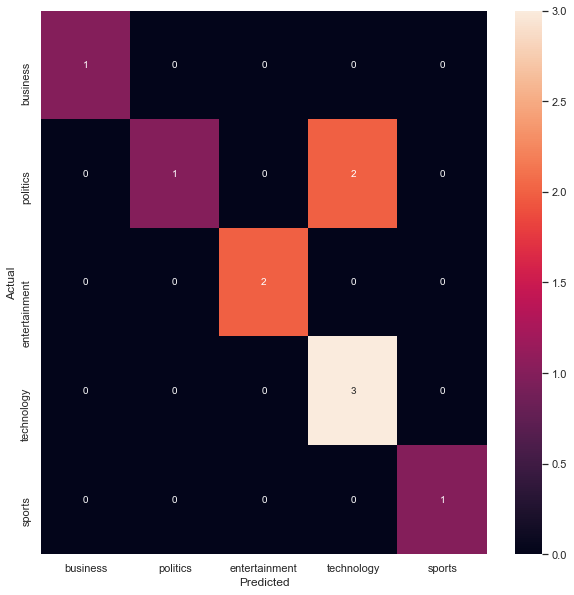

In [25]:
conf_mat = confusion_matrix(y_test, predicted)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=classification_text.CATEGORY.unique(), yticklabels=classification_text.CATEGORY.unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()